In [1]:
#Select the cell and click on run icon 
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [3]:
#Select the cell and click on run icon 
data = pd.read_excel('cep1_dataset (1).xlsx')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Select the cell and click on run icon 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#Select the cell and click on run icon 
data.duplicated().sum()

1

In [6]:
#Select the cell and click on run icon 
data.drop_duplicates(inplace = True)
data.reset_index(drop = True, inplace = True)

In [7]:
#Select the cell and click on run icon 
#checking duplicate again
data.duplicated().sum()

0

In [8]:
#Select the cell and click on run icon 
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
#Select the cell and click on run icon 
data.rename({'cp' :'chest_pain_type',
             'trestbps':'resting_blood_pressure', 
             'chol':'cholesterol', 
             'fbs' :'fasting_blood_sugar', 
             'restecg':'resting_ecg',
             'thalach' : 'max_heart_rate',
             'exang':'exercise_induced_angina',
             'oldpeak':'st_depression',
             'slope':'st_slope',
             'ca' : 'major_vessels', 
             'thal' :'thalessimia' },axis = 1, inplace = True)

In [10]:
#Select the cell and click on run icon 
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'major_vessels',
       'thalessimia', 'target'],
      dtype='object')

In [11]:
#Select the cell and click on run icon 
cat = ['sex','chest_pain_type','fasting_blood_sugar','exercise_induced_angina','st_slope','thalessimia']

In [12]:
#Select the cell and click on run icon 
data.loc[ : , ~data.columns.isin(cat)].describe()

,age,resting_blood_pressure,cholesterol,resting_ecg,max_heart_rate,st_depression,major_vessels,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,0.526490,149.569536,1.043046,0.718543,0.543046
std,9.04797,17.563394,51.753489,0.526027,22.903527,1.161452,1.006748,0.498970
min,29.00000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,0.000000,133.250000,0.000000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,1.000000,152.500000,0.800000,0.000000,1.000000
75%,61.00000,140.000000,274.750000,1.000000,166.000000,1.600000,1.000000,1.000000
max,77.00000,200.000000,564.000000,2.000000,202.000000,6.200000,4.000000,1.000000


In [13]:
#Select the cell and click on run icon 
desc= pd.DataFrame(index = cat)
desc['nuinque'] = data[cat].apply(lambda x : x.nunique(), axis = 0)
desc['unique'] = 0
for i in cat :
    desc.loc[i,'unique'] = str(list(data[i].value_counts().index))
desc.T

,sex,chest_pain_type,fasting_blood_sugar,exercise_induced_angina,st_slope,thalessimia
nuinque,2,4,2,2,3,4
unique,"[1, 0]","[0, 2, 1, 3]","[0, 1]","[0, 1]","[2, 1, 0]","[2, 3, 1, 0]"


In [14]:
#Select the cell and click on run icon 
data.thalessimia.value_counts()

2    165
3    117
1     18
0      2
Name: thalessimia, dtype: int64

In [15]:
#Select the cell and click on run icon 
data.loc[data.thalessimia==0 , 'thalessimia'] = 2

In [16]:
#Select the cell and click on run icon 
data.loc[data.sex == 0 , 'sex'] = 'female'
data.loc[data.sex == 1, 'sex'] = 'male'

data.loc[data.chest_pain_type == 0,'chest_pain_type'] = 'typical angina'
data.loc[data.chest_pain_type == 1,'chest_pain_type'] = 'atypical angina'
data.loc[data.chest_pain_type == 2,'chest_pain_type'] = 'non-anginal pain'
data.loc[data.chest_pain_type == 3,'chest_pain_type'] = 'asymptomatic'

data.loc[data.fasting_blood_sugar == 0,'fasting_blood_sugar'] = '< 120mg/ml'
data.loc[data.fasting_blood_sugar == 1,'fasting_blood_sugar'] = '> 120mg/ml'

data.loc[data.resting_ecg == 0, 'resting_ecg']  = 'normal'
data.loc[data.resting_ecg == 1 , 'resting_ecg'] = 'abnormal'
data.loc[data.resting_ecg == 2 , 'resting_ecg'] = 'hyper'

data.loc[data.exercise_induced_angina == 0, 'exercise_induced_angina'] = 'no'
data.loc[data.exercise_induced_angina == 1, 'exercise_induced_angina'] = 'yes'

data.loc[data.st_slope == 0, 'st_slope'] = 'upsloping'
data.loc[data.st_slope == 1, 'st_slope'] = 'flat'
data.loc[data.st_slope == 2, 'st_slope'] = 'downsloping'

data.loc[data.thalessimia == 1,'thalessimia'] = 'normal'
data.loc[data.thalessimia == 2,'thalessimia'] = 'fixed defect'
data.loc[data.thalessimia == 3,'thalessimia'] = 'reversable defect'

#data.loc[data.target == 0, 'target']= 'Disease -'
#data.loc[data.target == 1, 'target']= 'Disease +'

In [17]:
#Select the cell and click on run icon 
dsprsnt = data[data.target == 1].copy()
dsabsnt = data[data.target == 0].copy()

In [18]:
#Select the cell and click on run icon 
vc = data.target.value_counts()
vc

1    164
0    138
Name: target, dtype: int64

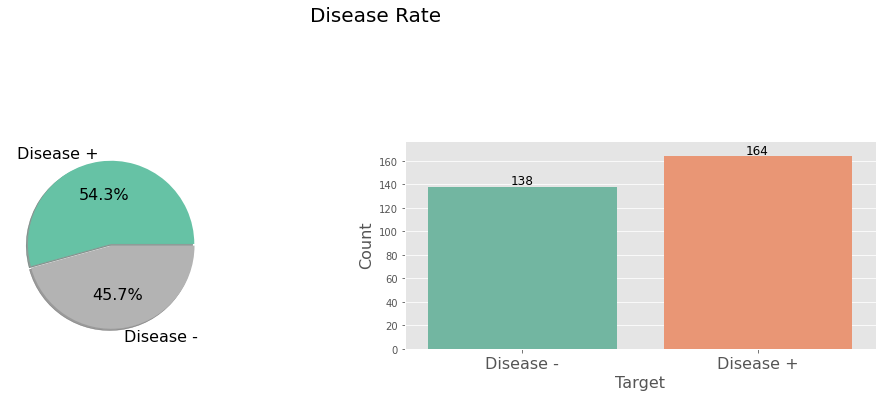

In [19]:
#Select the cell and click on run icon 
f,axes = plt.subplots(1,2, figsize = (15,6))
# plot no. 1
vc.plot.pie(ax = axes[0], radius = 1, cmap = 'Set2' , explode = [0.01,0.01], shadow = True, autopct = '%1.1f%%',
           textprops = {'family': 'DejaVu Sans','color': 'black','size': 16}, labels = ['Disease +','Disease -'])
axes[0].set_ylabel('')

# plot no. 2
sns.countplot(data.target,ax = axes[1],palette= 'Set2')
for i in range(len(vc)):
    axes[1].annotate(vc[i], (i-0.05,vc[i]+2), fontsize = 12)
axes[1].set_ylim(0,axes[1].set_ylim()[1]+5)
axes[1].set_xlabel('Target',fontsize = 16, family = 'DejaVu Sans')
axes[1].set_ylabel('Count',fontsize = 16, family = 'DejaVu Sans')
axes[1].set_xticklabels( ['Disease -','Disease +'], fontsize = 16, family = 'DejaVu Sans')
f.suptitle('Disease Rate\n\n', fontsize = 20, family = 'DejaVu Sans')
plt.tight_layout(pad = 4)
plt.show();

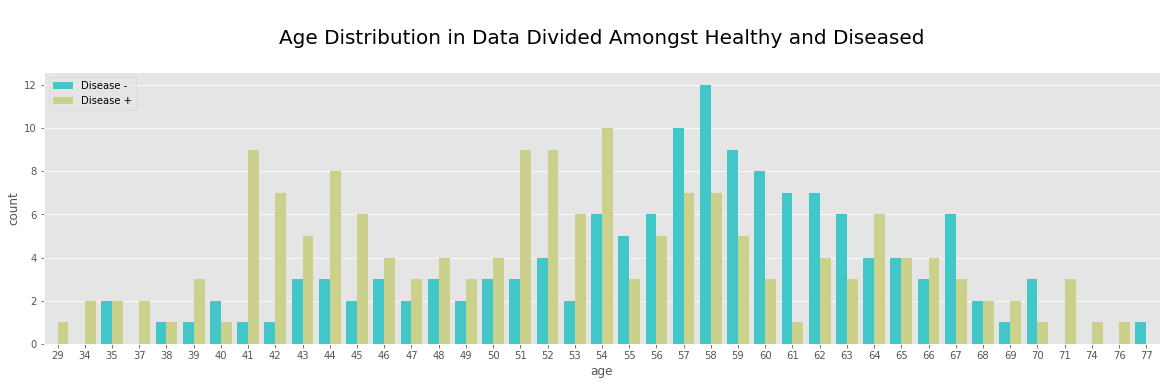

In [20]:
#Select the cell and click on run icon 
plt.figure(figsize = (20,5))
sns.countplot(data.age, hue = data.target, palette='rainbow')
plt.legend(['Disease -','Disease +'], loc = 'upper left')
plt.title('\nAge Distribution in Data Divided Amongst Healthy and Diseased\n', fontsize = 20)
plt.show()

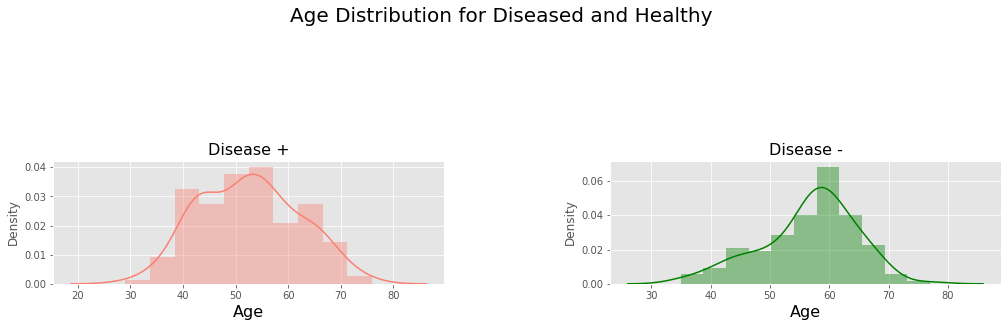

In [21]:
#Select the cell and click on run icon 
f,axes = plt.subplots(1,2, figsize = (15,5))
sns.distplot(dsprsnt.age,ax = axes[0], color = 'salmon')
sns.distplot(dsabsnt.age, ax = axes[1], color = 'green')
axes[0].set_title('Disease +',fontdict = {'family': 'DejaVu Sans','size': 16})
axes[1].set_title('Disease -',fontdict = {'family': 'DejaVu Sans','size': 16})
axes[0].set_xlabel('Age', fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16})
axes[1].set_xlabel('Age',fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16})
f.suptitle('Age Distribution for Diseased and Healthy\n\n ',fontsize= 20)
plt.tight_layout(w_pad= 12, pad = 4 )
plt.show()

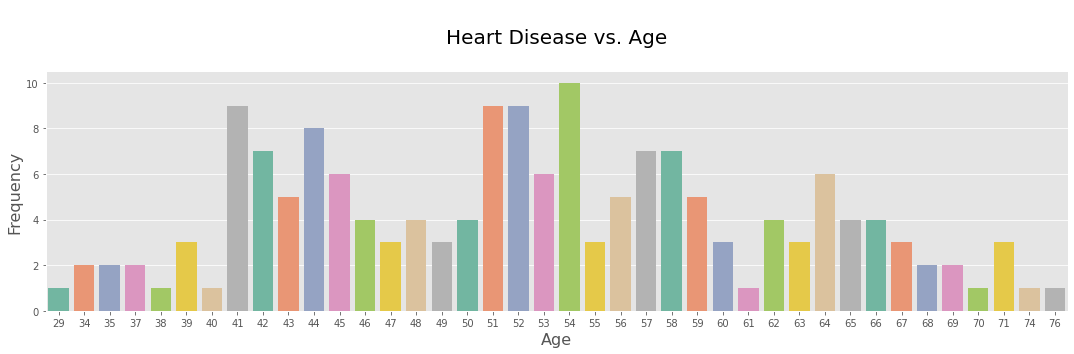

In [22]:
#Select the cell and click on run icon 
plt.figure(figsize = (15,5))
sns.countplot(dsprsnt.age, palette='Set2')
plt.title('\nHeart Disease vs. Age\n',family='DejaVu Sans',fontsize= 20)
plt.tight_layout( )
plt.xlabel('Age',family='DejaVu Sans',fontsize= 16)
plt.ylabel('Frequency',family='DejaVu Sans',fontsize= 16)
plt.show()

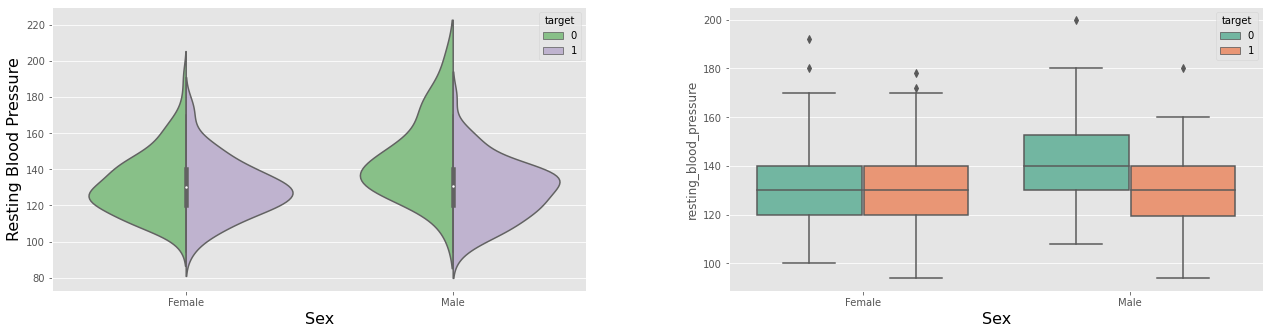

In [23]:
#Select the cell and click on run icon 
f,axes = plt.subplots(1,2,figsize = (18,5))
sns.violinplot(y = 'resting_blood_pressure', x = 'sex',hue = 'target',data = data, split = True, palette= 'Accent', ax = axes[0])
axes[0].set_xlabel('Sex', fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16})
axes[0].set_ylabel('Resting Blood Pressure', fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16})
axes[0].set_xticklabels(['Female','Male'])
sns.boxplot(x = data.sex,  y = data.resting_blood_pressure, hue = data.target, ax = axes[1], palette='Set2')
axes[1].set_xticklabels(['Female','Male'])
axes[1].set_xlabel('Sex',fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16})
plt.tight_layout(w_pad = 10, pad = 2)
plt.show()

In [24]:
#Select the cell and click on run icon 
#1. cat_plot
def cat_plot(var):
    f,axes = plt.subplots(1,2, figsize = (18,5))
    vc = data[var].value_counts() 
    nouniq = data[var].nunique()
    # overall pie
    vc.plot.pie(radius = 1.25,ax = axes[0], cmap = 'Set3', autopct = '%0.1f%%',
                                        textprops = {'family': 'times','color': 'black','size': 16},
                                        explode = [0.02]*nouniq,shadow = True,)
    axes[0].set_ylabel('')
    axes[0].set_title('Overall {} Distribution\n'.format(var.capitalize()),family='DejaVu Sans',fontsize= 20)
    
    # count plot
    #pd.crosstab(data[var], data.target).plot.bar(cmap = 'Set2', ax = axes[1])
    sns.countplot(x = data[var], hue = data.target, ax = axes[1], palette='Set2')
    plt.xticks( fontsize = 15, color = 'black' , family =  'DejaVu Sans', rotation = 0)
    axes[1].set_xlabel(var.capitalize(),fontsize = 16, color = 'black' , family =  'DejaVu Sans', rotation = 0)
    axes[1].set_ylabel('Count',fontsize = 16, color = 'black' , family =  'DejaVu Sans')
    axes[1].legend(['Disease -','Disease +'])
    axes[1].set_title('Heart Disease by {}\n'.format( var.capitalize()) ,family='DejaVu Sans',fontsize= 20)
    plt.tight_layout(pad = 4 )
    plt.show()

In [25]:
#Select the cell and click on run icon 
#2. real_distribution
def real_distribution(var):
    f,axes = plt.subplots(1,2, figsize = (15,5))
    sns.distplot(dsprsnt[var],ax = axes[0], color = 'salmon')
    sns.distplot(dsabsnt[var], ax = axes[0], color = 'green')
    sns.boxplot(y = data[var], x = data.target, ax = axes[1], palette='Set2')
    axes[0].set_xlabel(var, fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16})
    axes[1].set_ylabel(var, fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16})
    axes[1].set_xlabel('Target', fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16})
    axes[1].set_xticklabels(['Disease -','Disease +'])
    f.suptitle('{} vs Disease\n\n '.format(var.capitalize()),fontsize= 20, family = 'DejaVu Sans')
    plt.tight_layout(w_pad= 12, pad = 4 )
    plt.show()

findfont: Font family ['times'] not found. Falling back to DejaVu Sans.


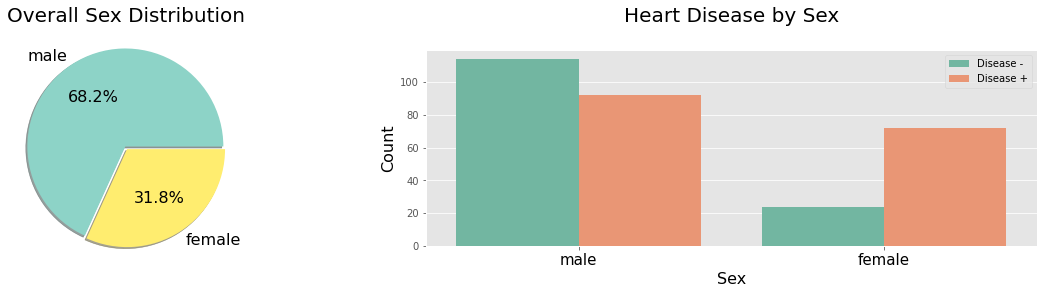

In [26]:
#Select the cell and click on run icon 
cat_plot('sex')

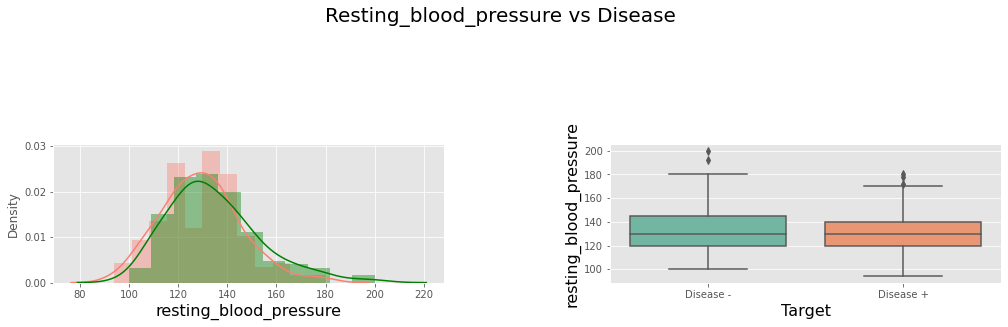

In [27]:
#Select the cell and click on run icon 
real_distribution('resting_blood_pressure')

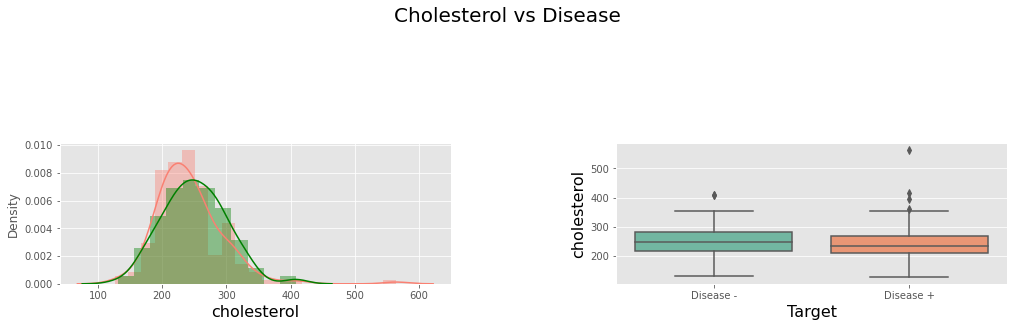

In [28]:
#Select the cell and click on run icon 
real_distribution('cholesterol')

findfont: Font family ['georgia'] not found. Falling back to DejaVu Sans.


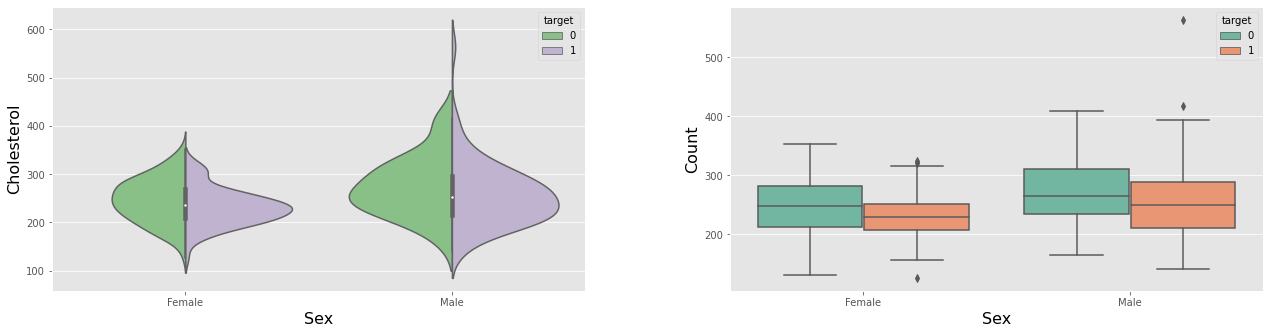

In [29]:
#Select the cell and click on run icon 
f,axes = plt.subplots(1,2,figsize = (18,5))
sns.violinplot(y = 'cholesterol', x = 'sex',hue = 'target',data = data, split = True, palette= 'Accent', ax = axes[0])
axes[0].set_xlabel('Sex', fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16})
axes[0].set_ylabel('Cholesterol', fontdict = {'family': 'georgia','color': 'black','weight': 'normal','size': 16})
axes[0].set_xticklabels(['Female','Male'])
sns.boxplot(x = data.sex,  y = data.cholesterol, hue = data.target, ax = axes[1], palette='Set2')
axes[1].set_xticklabels(['Female','Male'])
axes[1].set_xlabel('Sex',fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16} )
axes[1].set_ylabel('Count',fontdict = {'family': 'DejaVu Sans','color': 'black','weight': 'normal','size': 16} )
plt.tight_layout(w_pad = 10, pad = 2)
plt.show()

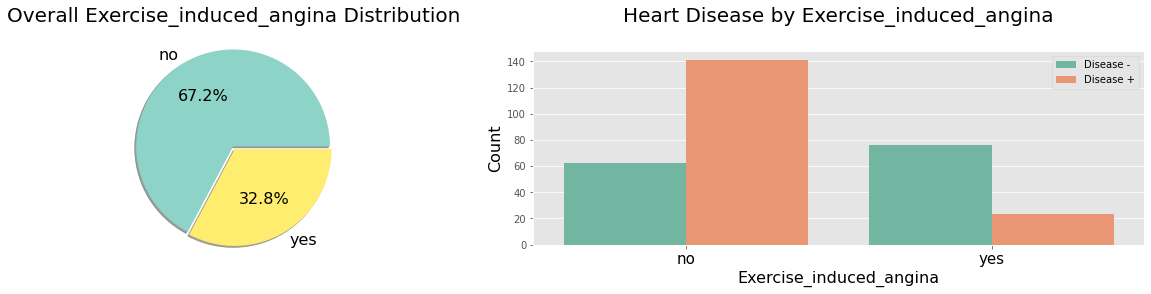

In [30]:
#Select the cell and click on run icon 
cat_plot('exercise_induced_angina')

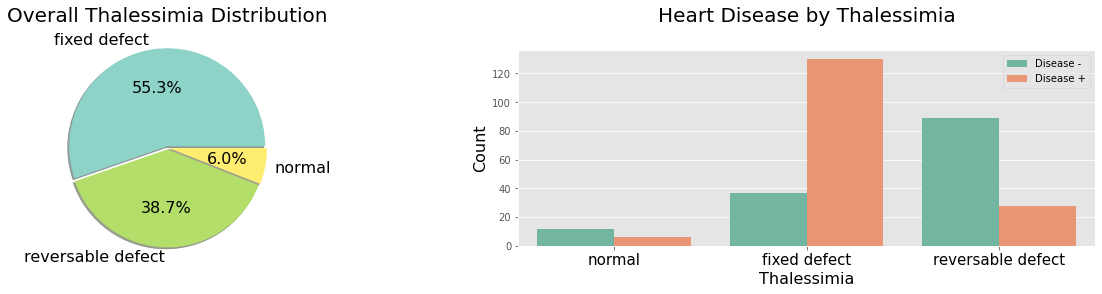

In [31]:
#Select the cell and click on run icon 
cat_plot('thalessimia')

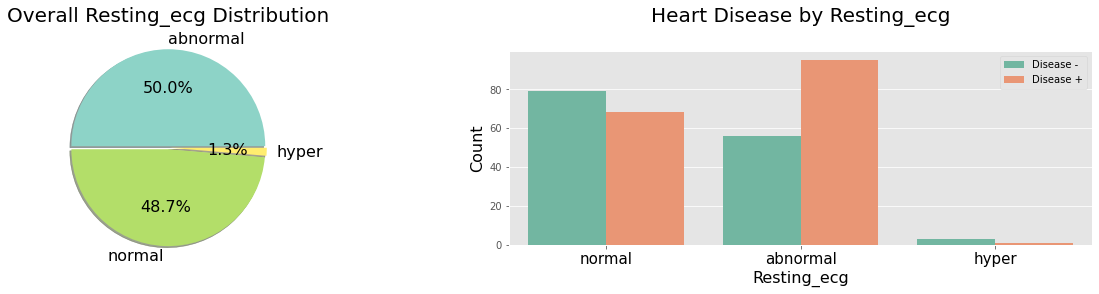

In [32]:
#Select the cell and click on run icon 
cat_plot('resting_ecg')

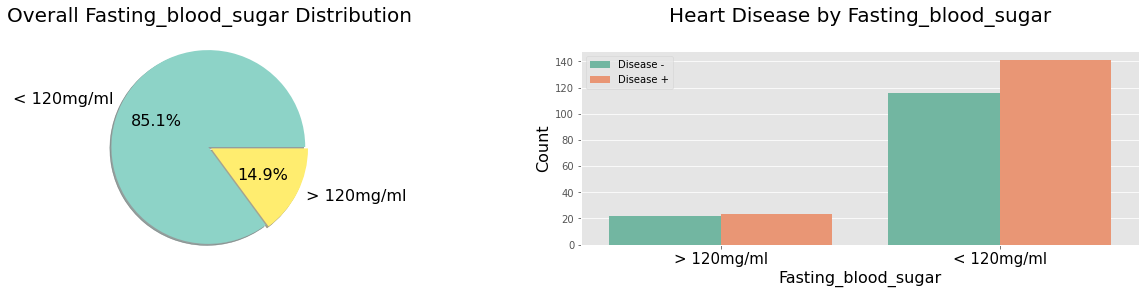

In [33]:
#Select the cell and click on run icon 
cat_plot('fasting_blood_sugar')

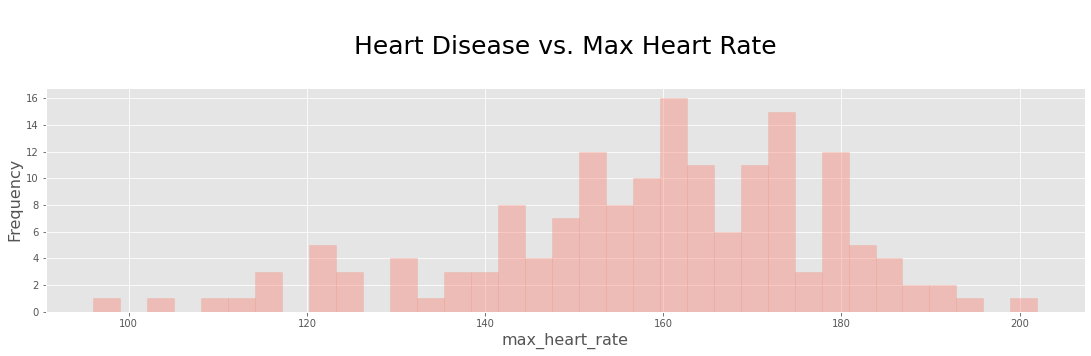

In [34]:
#Select the cell and click on run icon 
#real_distribution('max_heart_rate')
plt.figure(figsize = (15,5))
sns.distplot(dsprsnt.max_heart_rate, kde = False, bins = 35, hist_kws = {'edgecolor':'darksalmon', 'color' :'salmon'})
plt.title('\nHeart Disease vs. Max Heart Rate\n',family='DejaVu Sans',fontsize= 25)
plt.tight_layout( )
plt.xlabel('max_heart_rate',family='DejaVu Sans',fontsize= 16)
plt.ylabel('Frequency',family='DejaVu Sans',fontsize= 16)
plt.show()

In [35]:
#Select the cell and click on run icon 
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'major_vessels',
       'thalessimia', 'target'],
      dtype='object')

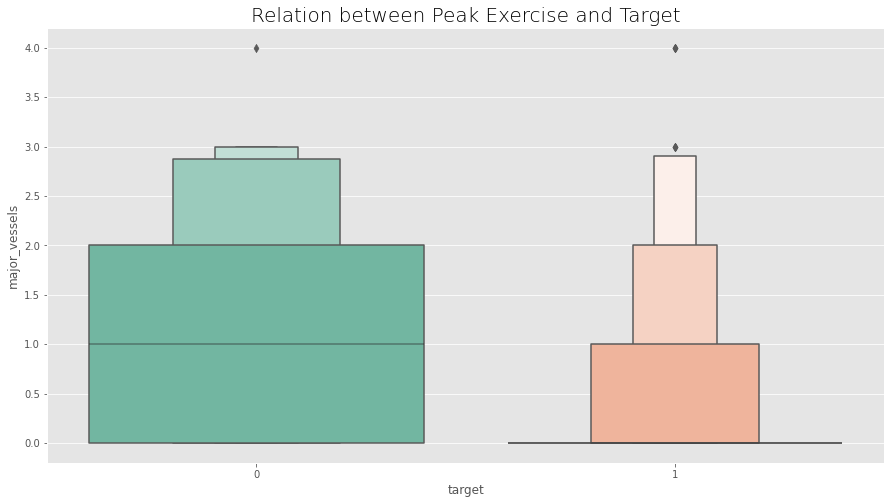

In [36]:
#Select the cell and click on run icon 
plt.figure(figsize= (15,8))
sns.boxenplot(data['target'], data['major_vessels'], palette = 'Set2')
plt.title('Relation between Peak Exercise and Target', fontsize = 20, fontweight = 30)
plt.show()

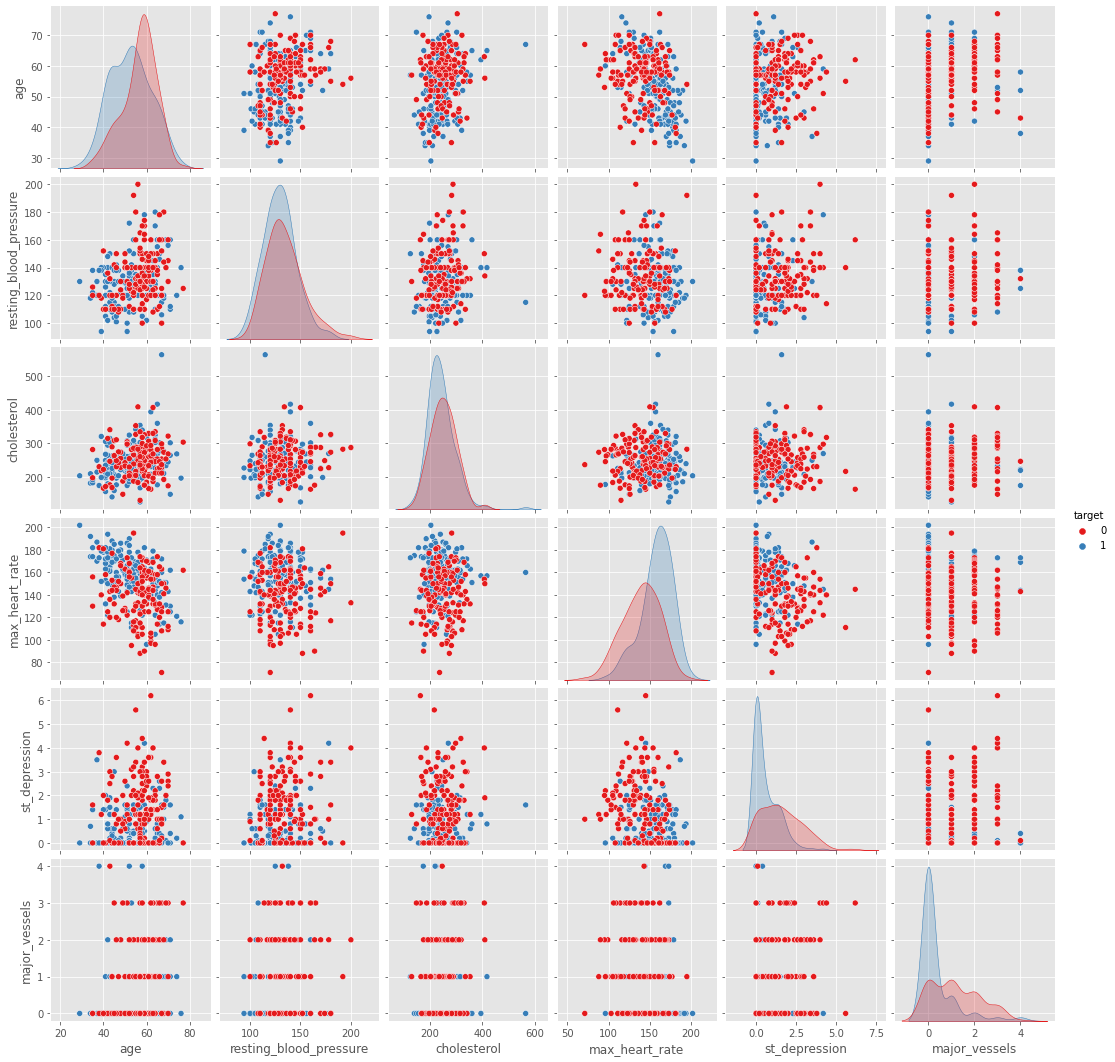

In [37]:
#Select the cell and click on run icon 
sns.pairplot(data, hue = 'target', palette='Set1')

In [38]:
#Select the cell and click on run icon 
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalessimia,target
0,63,male,asymptomatic,145,233,> 120mg/ml,normal,150,no,2.3,upsloping,0,normal,1
1,37,male,non-anginal pain,130,250,< 120mg/ml,abnormal,187,no,3.5,upsloping,0,fixed defect,1
2,41,female,atypical angina,130,204,< 120mg/ml,normal,172,no,1.4,downsloping,0,fixed defect,1
3,56,male,atypical angina,120,236,< 120mg/ml,abnormal,178,no,0.8,downsloping,0,fixed defect,1
4,57,female,typical angina,120,354,< 120mg/ml,abnormal,163,yes,0.6,downsloping,0,fixed defect,1


In [39]:
#Select the cell and click on run icon 
corr = data.corr()

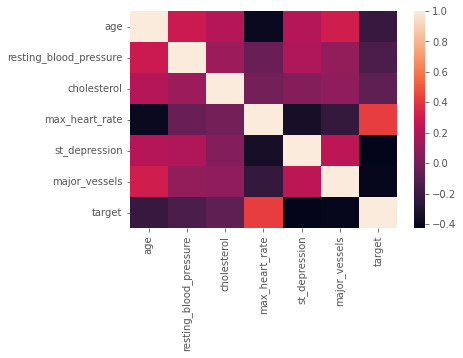

In [40]:
#Select the cell and click on run icon 
sns.heatmap(corr);

In [41]:
#Select the cell and click on run icon 
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [42]:
#Select the cell and click on run icon 
data0 = data.drop(['sex','chest_pain_type','fasting_blood_sugar','exercise_induced_angina','resting_ecg','st_slope','thalessimia'], axis=1)


train0, test0 = split(data0, test_size = .30, random_state = 12)
print(train0.shape)

train0.head(2)

(211, 7)


,age,resting_blood_pressure,cholesterol,max_heart_rate,st_depression,major_vessels,target
137,62,128,208,140,0.0,0,1
231,55,160,289,145,0.8,1,0


In [43]:
#Select the cell and click on run icon 
X_train0 = train0.drop('target', axis = 1)
Y_train0 = train0.target
X_test0 = test0.drop('target', axis = 1)
Y_test0 = test0.target

In [44]:
#Select the cell and click on run icon 
lr = LogisticRegression()
lr.fit(X_train0,Y_train0)

pred0 = lr.predict(X_test0)

In [45]:
#Select the cell and click on run icon 
accuracy_score(y_true = Y_test0,y_pred = pred0)

print(classification_report(y_true=Y_test0,y_pred = pred0))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        45
           1       0.81      0.83      0.82        46

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [46]:
#Select the cell and click on run icon 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test0, pred0))

[[36  9]
 [ 8 38]]


In [47]:
#Select the cell and click on run icon 
#Accuracy of confusion matrix
Acc0 = (36+38)/(36+8+9+38)
Acc0

0.8131868131868132

In [48]:
#Select the cell and click on run icon 
from sklearn.ensemble import RandomForestClassifier
clf0 = RandomForestClassifier(n_estimators=100)
clf0.fit(X_train0, Y_train0)
y_pred_random_forest0 = clf0.predict(X_test0)
acc_random_forest0 = round(clf0.score(X_train0, Y_train0) * 100, 2)
print (acc_random_forest0)

100.0


In [49]:
#Select the cell and click on run icon 
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test0, y_pred_random_forest0))

Accuracy: 0.7472527472527473


In [50]:
#Select the cell and click on run icon 
#Male=1, Female=0
#Converting sex to numerical variable in data
data['sex'] = data['sex'].map( {'male': 1, 'female': 0} ).astype(int)

#Converting resting_ecg to numerical variable in data
data['resting_ecg'] = data['resting_ecg'].map( {'normal': 0, 'abnormal': 1, 'hyper': 2} ).astype(int)

#Converting thalessimia to numerical variable in data
data['thalessimia'] = data['thalessimia'].map( {'normal': 0, 'fixed defect': 1, 'reversable defect': 2} ).astype(int)

#Converting chest_pain_type to numerical variable in data
data['chest_pain_type'] = data['chest_pain_type'].map( {'asymptomatic': 0, 'atypical angina': 1, 'non-anginal pain': 2, 'typical angina': 3} ).astype(int)

#Converting fasting_blood_sugar to numerical variable in data
data['fasting_blood_sugar'] = data['fasting_blood_sugar'].map( {'< 120mg/ml': 0, '> 120mg/ml': 1} ).astype(int)

##Converting st_slope to numerical variable in data
data['st_slope'] = data['st_slope'].map( {'upsloping': 0, 'downsloping': 1, 'flat': 2} ).astype(int)

##Converting exercise_induced_angina to numerical variable in data
data['exercise_induced_angina'] = data['exercise_induced_angina'].map( {'no': 0, 'yes': 1} ).astype(int)

In [51]:
#Select the cell and click on run icon 
data.head(1)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalessimia,target
0,63,1,0,145,233,1,0,150,0,2.3,0,0,0,1


In [52]:
#Select the cell and click on run icon 
#Replicating dataset
data_LR = data
data_LR.head(2)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalessimia,target
0,63,1,0,145,233,1,0,150,0,2.3,0,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1,1


In [53]:
#Select the cell and click on run icon 
#Splitting the dataset
train_LR, test_LR = split(data_LR, test_size = .30, random_state = 12)
print(train_LR.shape)

train_LR.head(2)

(211, 14)


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalessimia,target
137,62,1,1,128,208,1,0,140,0,0.0,1,0,1,1
231,55,1,3,160,289,0,0,145,1,0.8,2,1,2,0


In [54]:
#Select the cell and click on run icon 
X_train_LR = train_LR.drop('target', axis = 1)
Y_train_LR = train_LR.target
X_test_LR = test_LR.drop('target', axis = 1)
Y_test_LR = test_LR.target

In [55]:
#Select the cell and click on run icon 
import statsmodels.api as sm
#Apply logistic regression
model_LR = sm.Logit(Y_train_LR, X_train_LR)
model_LR = model_LR.fit()
#Find the summary
model_LR.summary()

Optimization terminated successfully.
         Current function value: 0.379944
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  211
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                           12
Date:                Tue, 20 Dec 2022   Pseudo R-squ.:                  0.4462
Time:                        06:19:50   Log-Likelihood:                -80.168
converged:                       True   LL-Null:                       -144.77
Covariance Type:            nonrobust   LLR p-value:                 8.921e-22
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                         0.0228      0.022      1.032      0.302      -0.021       0.066
sex                        -1.5938      0.490     -3.251      0.001      -2.555      -0.633
chest_pain_type            -0.4338      0.221     -1.959      0.050      -0.868       0.000
resting_blood_pressure     -0.0174      0.011     -1.560      0.119      -0.039       0.004
cholesterol                -0.0028      0.005     -0.615      0.539      -0.012       0.006
fasting_blood_sugar         0.6102      0.607      1.005      0.315      -0.580       1.800
resting_ecg                 0.7108      0.391      1.820      0.069      -0.055       1.476
max_heart_rate              0.0411      0.010      4.180      0.000       0.022       0.060
exercise_induced_angina    -0.5806      0.485     -1.196      0.232      -1.532       0.371
st_depression              -0.7242      0.240     -3.019      0.003      -1.194      -0.254
st_slope                    0.1797      0.365      0.492      0.623      -0.536       0.896
major_vessels              -0.8405      0.236     -3.557      0.000      -1.304      -0.377
thalessimia                -1.1985      0.347     -3.459      0.001      -1.878      -0.519
===========================================================================================
"""

In [56]:
#Select the cell and click on run icon 
data_LR.head(2)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalessimia,target
0,63,1,0,145,233,1,0,150,0,2.3,0,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1,1


In [57]:
#Select the cell and click on run icon 
#dropping variables
data_Log = data_LR.drop(['age','resting_blood_pressure','cholesterol','fasting_blood_sugar','resting_ecg','exercise_induced_angina','st_slope'], axis=1)

In [58]:
#Select the cell and click on run icon 
train_Log, test_Log = split(data_Log, test_size = .30, random_state = 12)

In [59]:
#Select the cell and click on run icon 
print(train_Log.shape)

train_Log.head(2)

(211, 7)


,sex,chest_pain_type,max_heart_rate,st_depression,major_vessels,thalessimia,target
137,1,1,140,0.0,0,1,1
231,1,3,145,0.8,1,2,0


In [60]:
#Select the cell and click on run icon 
print(test_Log.shape)

test_Log.head(2)

(91, 7)


,sex,chest_pain_type,max_heart_rate,st_depression,major_vessels,thalessimia,target
227,1,0,159,0.2,0,2,0
136,0,2,96,0.0,0,1,1


In [61]:
#Select the cell and click on run icon 
X_train_Log = train_Log.drop('target', axis = 1)
Y_train_Log = train_Log.target
X_test_Log = test_Log.drop('target', axis = 1)
Y_test_Log = test_Log.target

In [62]:
#Select the cell and click on run icon 
#import statsmodels.api as sm
#Apply logistic regression
model_Log = sm.Logit(Y_train_Log, X_train_Log)
model_Log = model_Log.fit()
#Find the summary
model_Log.summary()

Optimization terminated successfully.
         Current function value: 0.400084
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  211
Model:                          Logit   Df Residuals:                      205
Method:                           MLE   Df Model:                            5
Date:                Tue, 20 Dec 2022   Pseudo R-squ.:                  0.4169
Time:                        06:20:43   Log-Likelihood:                -84.418
converged:                       True   LL-Null:                       -144.77
Covariance Type:            nonrobust   LLR p-value:                 2.227e-24
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
sex                -1.4688      0.447     -3.284      0.001      -2.346      -0.592
chest_pain_type    -0.4832      0.200     -2.418      0.016      -0.875      -0.092
max_heart_rate      0.0333      0.005      7.022      0.000       0.024       0.043
st_depression      -0.7740      0.205     -3.778      0.000      -1.175      -0.372
major_vessels      -0.8070      0.218     -3.704      0.000      -1.234      -0.380
thalessimia        -1.1471      0.316     -3.631      0.000      -1.766      -0.528
===================================================================================
"""

In [63]:
#Select the cell and click on run icon 
pred_Log = model_Log.predict(X_test_Log)
model_Log.predict(X_train_Log)

137    0.826704
231    0.140540
68     0.928333
142    0.974590
149    0.804113
         ...   
259    0.345733
130    0.924623
241    0.156410
253    0.824364
155    0.785966
Length: 211, dtype: float64

In [64]:
#Select the cell and click on run icon 
#Confusion matrix
(model_Log.predict(X_train_Log) >= 0.5).astype(int)
model_Log.pred_table()

array([[ 72.,  21.],
       [ 13., 105.]])

In [65]:
#Select the cell and click on run icon 
#Accuracy
print((72+105)/(72+21+13+105))

0.8388625592417062


In [66]:
#Select the cell and click on run icon 
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators=100)
clf_RF.fit(X_train_Log, Y_train_Log)
y_pred_random_forest_RF = clf_RF.predict(X_test_Log)
acc_random_forest_RF = round(clf_RF.score(X_train_Log, Y_train_Log) * 100, 2)
print (acc_random_forest_RF)

100.0


In [67]:
#Select the cell and click on run icon 
#Predict
#Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test_Log, y_pred_random_forest_RF))

Accuracy: 0.7362637362637363


In [68]:
#Select the cell and click on run icon 
lr_slog = LogisticRegression()
lr_slog.fit(X_train_Log,Y_train_Log)

pred_slog = lr_slog.predict(X_test_Log)

In [69]:
#Select the cell and click on run icon 
#Y_test_Log
pred_slog

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1])

In [70]:
#Select the cell and click on run icon 
accuracy_score(y_true = Y_test_Log,y_pred = pred_slog)

print(classification_report(y_true=Y_test_Log,y_pred = pred_slog))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        45
           1       0.82      0.80      0.81        46

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [71]:
#Select the cell and click on run icon 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test_Log, pred_slog))

[[37  8]
 [ 9 37]]


In [72]:
#Select the cell and click on run icon 
#Accuracy of confusion matrix
Acc_slog = (37+37)/(37+9+8+37)
Acc_slog

0.8131868131868132

In [73]:
#Select the cell and click on run icon 
from sklearn.ensemble import RandomForestClassifier
clf0 = RandomForestClassifier(n_estimators=100)
clf0.fit(X_train_Log, Y_train_Log)
y_pred_random_forest_Log = clf0.predict(X_test_Log)
acc_random_forest_Log = round(clf0.score(X_train_Log, Y_train_Log) * 100, 2)
print (acc_random_forest_Log)

100.0


In [74]:
#Select the cell and click on run icon 
#Predict
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test_Log, y_pred_random_forest_Log))

Accuracy: 0.7362637362637363
